## Team 13 Final Project

## Project Overview
The focus of this project is to examine the validity of the Quantity Theory of Money, a fundamental macroeconomic model for predicting the inflation rate. According to the theory, there should be a positive relationship between money supply (M2) and price level (CPI). In this project, real-world data like CPI, GDP, and M2 from the past 20 years will be explored to test the relationship between these variable data using linear regression analysis. 

## Group Project Structure
The project will begin with a data report provided, which will explain the origin of the data and how to access the data.

The second part of the project will provide summary statistics about M2, CPI, GDP, Velocity of M2, and visualizations of these statistics to help further illustrate the project.

The third part of the project will state a hypothesis based on the Quantity Theory of Money. Then, the project will conduct a linear regression on two periods of time (1960-1980 and 1999-2019). For the data from 1960 to 1980 in which the velocity of M2 was relatively constant, the project will test the hypothesis to study whether the model predicts a positive relationship between M2 and CPI in the real world; for the data from 1999 to 2019 in which the velocity of M2 dropped significantly, the project will examine the impact of the velocity of M2 on the model. 

Lastly, there will be a detailed discussion of the results and how it follows or goes against the model. 

## Data Report:
The data for this project comes from the Federal Reserve Economic Data website (FRED). FRED provides data on the U.S. CPI (where we will compute the inflation rate), M2, GDP, Velocity of M2 (it will serve as a control variable in our analysis) from 1960 to 1980 and from 1999 to 2019. The data can be accessed at https://fred.stlouisfed.org.

## Key variables: 

The four key variables in this project are M2, CPI, GDP, and Velocity of M2. 

M2 includes a broader set of financial assets held principally by households. M2 consists of M1 plus: (1) savings deposits (which include money market deposit accounts, or MMDAs); (2) small-denomination time deposits (time deposits in amounts of less than $100,000); and (3) balances in retail money market mutual funds (MMMFs). 

The Consumer Price Index (CPI) is a measure of the average change in the price of a basket of consumer goods and services and helps measure price inflation for consumers.

Gross Domestic Product (GDP) is the total value of goods and services produced in a country annually.

The velocity of M2 is the frequency at which one unit of currency is used to purchase domestically- produced goods and services within a given time period. In other words, it is the number of times one dollar is spent to buy goods and services per unit of time. If the velocity of money is increasing, then more transactions are occurring between individuals in an economy.


In [1]:
# Key Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

In [2]:
# Access GDP Data
url_g = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GDPCA&scale=left&cosd=1960-01-01&coed=2019-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Annual&fam=avg&fgst=lin&fgsnd=2019-01-01&line_index=1&transformation=lin&vintage_date=2020-11-03&revision_date=2020-11-03&nd=1929-01-01'
data_g = pd.read_csv(url_g, parse_dates=True)
data_g.columns = ['DATE','US_GDP'] 
data_g.head()

,DATE,US_GDP
0,1960-01-01,3259.971
1,1961-01-01,3343.546
2,1962-01-01,3548.409
3,1963-01-01,3702.944
4,1964-01-01,3916.280


In [3]:
# Summary Statistics for GDP
data_g.describe()

,US_GDP
count,60.000000
mean,10002.882083
std,4782.658931
min,3259.971000
25%,5679.521500
50%,9273.744500
75%,14532.913750
max,19091.662000


In [4]:
# Convert Month to YEAR
# Rename the YEAR 
data_g['DATE'] = pd.DatetimeIndex(data_g['DATE']).year
data_g.columns = ['YEAR','US_GDP']
data_g = data_g.round(3)
data_g.head()

,YEAR,US_GDP
0,1960,3259.971
1,1961,3343.546
2,1962,3548.409
3,1963,3702.944
4,1964,3916.280


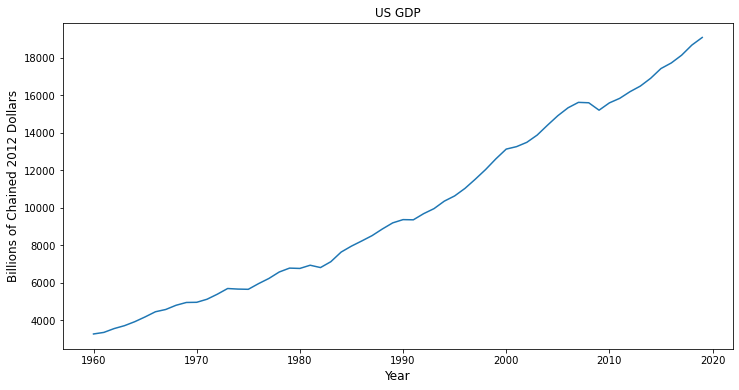

In [5]:
# Graphing the GDP
data_g1 = data_g.set_index('YEAR')
ax_g1 = data_g1.plot(title='US GDP', legend=False, figsize=(12,6))
ax_g1.set_xlabel('Year', fontsize=12,)
ax_g1.set_ylabel('Billions of Chained 2012 Dollars', fontsize=12)
plt.show()

In [6]:
# Access CPI Data
url_c = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=CPIAUCSL&scale=left&cosd=1960-01-01&coed=2019-12-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2020-11-09&revision_date=2020-11-09&nd=1947-01-01'
data_c = pd.read_csv(url_c, parse_dates=True)
data_c.columns = ['DATE','US_CPI']
data_c.head()

,DATE,US_CPI
0,1960-01-01,29.37
1,1960-02-01,29.41
2,1960-03-01,29.41
3,1960-04-01,29.54
4,1960-05-01,29.57


In [7]:
# Summary Statistics for CPI
data_c.describe()

,US_CPI
count,720.000000
mean,128.285533
std,74.108806
min,29.370000
25%,52.200000
50%,126.900000
75%,191.700000
max,258.444000


In [8]:
# Convert Month to YEAR
# Rename the YEAR
data_c['DATE'] = pd.DatetimeIndex(data_c['DATE']).year
data_c.columns = ['YEAR','US_CPI']
data_c.head()

,YEAR,US_CPI
0,1960,29.37
1,1960,29.41
2,1960,29.41
3,1960,29.54
4,1960,29.57


In [9]:
# Compute the yearly data from monthly data
data_c = data_c.groupby(['YEAR']).mean()
data_c = data_c.round(3)
data_c.head()

,US_CPI
YEAR,
1960,29.585
1961,29.902
1962,30.253
1963,30.633
1964,31.038


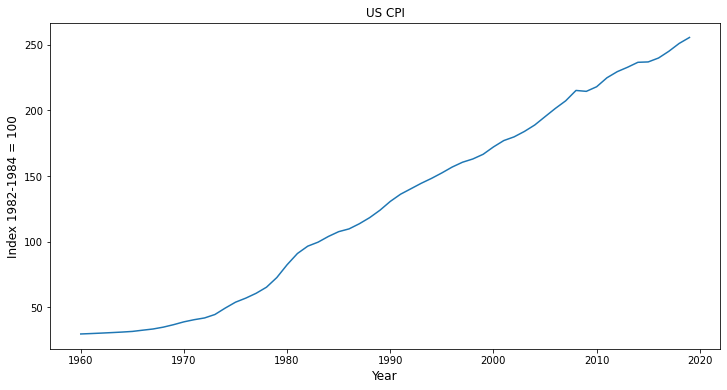

In [10]:
# Graphing the CPI
# data_c1 = data_c.set_index('YEAR') ## don't need to set index because YEAR is already an index
ax_c1 = data_c.plot(title='US CPI', legend=False, figsize=(12,6))
ax_c1.set_xlabel('Year', fontsize=12)
ax_c1.set_ylabel('Index 1982-1984 = 100', fontsize=12)
plt.show()

In [11]:
#Access M2 Data
url_m = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=M2SL&scale=left&cosd=1960-01-01&coed=2019-12-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2020-11-09&revision_date=2020-11-09&nd=1959-01-01'
data_m = pd.read_csv(url_m, parse_dates=True)
data_m.columns = ['DATE','US_M2'] 
data_m.head()

,DATE,US_M2
0,1960-01-01,298.2
1,1960-02-01,298.4
2,1960-03-01,299.3
3,1960-04-01,300.1
4,1960-05-01,300.9


In [12]:
# Summary Statistics for M2
data_m.describe()

,US_M2
count,720.000000
mean,4266.704306
std,4004.601048
min,298.200000
25%,905.250000
50%,3159.650000
75%,6406.550000
max,15307.100000


In [13]:
# Convert M2 Month to YEAR
# Rename the YEAR
data_m['DATE'] = pd.DatetimeIndex(data_m['DATE']).year
data_m.columns = ['YEAR','M2']
data_m.head()

,YEAR,M2
0,1960,298.2
1,1960,298.4
2,1960,299.3
3,1960,300.1
4,1960,300.9


In [14]:
# Compute the yearly data from monthly data
data_m = data_m.groupby(['YEAR']).mean()
data_m = data_m.round(3)
data_m.head()

,M2
YEAR,
1960,304.283
1961,324.833
1962,350.100
1963,379.608
1964,409.317


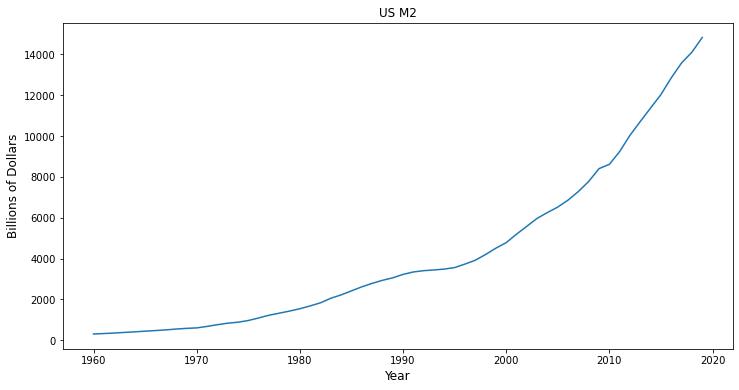

In [15]:
# Graphing the M2
ax_m1 = data_m.plot(title='US M2', legend=False, figsize=(12,6))
ax_m1.set_xlabel('Year', fontsize=12)
ax_m1.set_ylabel('Billions of Dollars', fontsize=12)
plt.show()

In [16]:
# Access V Data
url_v = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=M2V&scale=left&cosd=1960-01-01&coed=2019-12-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2020-11-09&revision_date=2020-11-09&nd=1959-01-01'
data_v = pd.read_csv(url_v, parse_dates=True)
data_v.columns = ['DATE','US_V'] 
data_v.head()

,DATE,US_V
0,1960-01-01,1.817
1,1960-04-01,1.797
2,1960-07-01,1.780
3,1960-10-01,1.737
4,1961-01-01,1.723


In [17]:
# Summary Statistics for V
data_v.describe()

,US_V
count,240.000000
mean,1.805742
std,0.186371
min,1.427000
25%,1.709500
50%,1.775000
75%,1.928750
max,2.198000


In [18]:
# Convert V MONTH to YEAR 
# Rename the YEAR
data_v['DATE'] = pd.DatetimeIndex(data_v['DATE']).year
data_v.columns = ['YEAR','V']
data_v.head()

,YEAR,V
0,1960,1.817
1,1960,1.797
2,1960,1.780
3,1960,1.737
4,1961,1.723


In [19]:
# Compute the Yearly data from quarterly data
data_v = data_v.groupby(['YEAR']).mean()
data_v = data_v.round(3)
data_v.head()

,V
YEAR,
1960,1.783
1961,1.730
1962,1.725
1963,1.679
1964,1.673


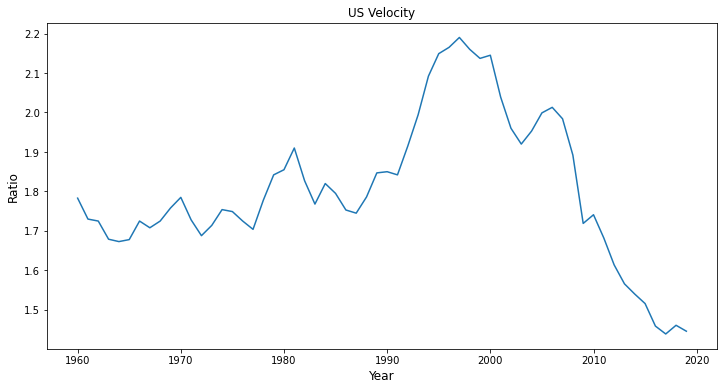

In [20]:
# Graphing the V
ax_v1 = data_v.plot(title='US Velocity', legend=False, figsize=(12,6))
ax_v1.set_xlabel('Year', fontsize=12)
ax_v1.set_ylabel('Ratio', fontsize=12)
plt.show()

In [25]:
merge_data=pd.merge(data_g, data_c, how='inner', on='YEAR', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)



In [26]:
merge_data=pd.merge(merge_data, data_m, how='inner', on='YEAR', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [27]:
merge_data=pd.merge(merge_data, data_v, how='inner', on='YEAR', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [37]:
merge_data


,YEAR,US_GDP,US_CPI,M2,V
0,1960,3259.971,29.585,304.283,1.783
1,1961,3343.546,29.902,324.833,1.730
2,1962,3548.409,30.253,350.100,1.725
3,1963,3702.944,30.633,379.608,1.679
4,1964,3916.280,31.038,409.317,1.673
5,1965,4170.750,31.528,442.450,1.678
6,1966,4445.853,32.471,471.375,1.725
7,1967,4567.781,33.375,503.642,1.708
8,1968,4792.315,34.792,545.300,1.725
9,1969,4942.067,36.683,578.725,1.758


### Analysis


In [42]:
merge_data = merge_data.set_index('YEAR')
merge_data.head()

,US_GDP,US_CPI,M2,V
YEAR,,,,
1960,3259.971,29.585,304.283,1.783
1961,3343.546,29.902,324.833,1.730
1962,3548.409,30.253,350.100,1.725
1963,3702.944,30.633,379.608,1.679
1964,3916.280,31.038,409.317,1.673


### TimeFrame 1: 1960-1979
v is constant --> M2 has a positive relationship with CPI

In [45]:
import statsmodels.api as sm

In [46]:
tf_1 = merge_data.loc['1960':'1979', :]
tf_1

,US_GDP,US_CPI,M2,V
YEAR,,,,
1960,3259.971,29.585,304.283,1.783
1961,3343.546,29.902,324.833,1.730
1962,3548.409,30.253,350.100,1.725
1963,3702.944,30.633,379.608,1.679
1964,3916.280,31.038,409.317,1.673
1965,4170.750,31.528,442.450,1.678
1966,4445.853,32.471,471.375,1.725
1967,4567.781,33.375,503.642,1.708
1968,4792.315,34.792,545.300,1.725


### Run the extended model

In [61]:
tf_1['const']=1

# Create lists of variables to be used in each regression
X1 = ['const', 'M2']

# Estimate an OLS regression for each set of variables
reg1 = sm.OLS(tf_1['US_CPI'], tf_1[X1], missing='drop').fit()

<ipython-input-61-e339a6d259a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf_1['const']=1


In [62]:
tf_1.head()

,US_GDP,US_CPI,M2,V,const
YEAR,,,,,
1960,3259.971,29.585,304.283,1.783,1
1961,3343.546,29.902,324.833,1.730,1
1962,3548.409,30.253,350.100,1.725,1
1963,3702.944,30.633,379.608,1.679,1
1964,3916.280,31.038,409.317,1.673,1


In [63]:
# Now that we have fitted our model, we will use summary_col to display the results in a single table (model numbers correspond to those in the paper)
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[reg1,reg2],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2'],
                            info_dict=info_dict,
                            regressor_order=['const',
                                             'M2',
                                             'V'])

results_table.add_title('Table 2 - OLS Regressions')

print(results_table)


     Table 2 - OLS Regressions
                 Model 1   Model 2 
-----------------------------------
const            15.58*** 184.84***
                 (0.83)   (55.15)  
M2               0.04***  0.01***  
                 (0.00)   (0.00)   
V                         -17.42   
                          (22.80)  
R-squared        0.99     0.94     
                 0.99     0.94     
R-squared        0.99     0.94     
No. observations 20       20       
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [57]:
tf_2 = merge_data.loc['2000':'2019', :]
tf_2

,US_GDP,US_CPI,M2,V
YEAR,,,,
2000,13130.987,172.192,4779.350,2.145
2001,13262.079,177.042,5191.825,2.039
2002,13493.064,179.867,5579.200,1.960
2003,13879.129,184.000,5968.833,1.920
2004,14406.382,188.908,6253.625,1.953
2005,14912.509,195.267,6521.608,1.999
2006,15338.257,201.558,6863.550,2.013
2007,15626.029,207.344,7283.975,1.984
2008,15604.687,215.254,7777.517,1.892


In [58]:
tf_2['const']=1

# Create lists of variables to be used in each regression
X1 = ['const', 'M2']
X2 = ['const','M2', 'V']

# Estimate an OLS regression for each set of variables
reg1 = sm.OLS(tf_2['US_CPI'], tf_2[X1], missing='drop').fit()
reg2 = sm.OLS(tf_2['US_CPI'], tf_2[X2], missing='drop').fit()

<ipython-input-58-446d89d158b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tf_2['const']=1


In [59]:
tf_1.head()

,US_GDP,US_CPI,M2,V,const
YEAR,,,,,
1960,3259.971,29.585,304.283,1.783,1
1961,3343.546,29.902,324.833,1.730,1
1962,3548.409,30.253,350.100,1.725,1
1963,3702.944,30.633,379.608,1.679,1
1964,3916.280,31.038,409.317,1.673,1


In [60]:
# Now that we have fitted our model, we will use summary_col to display the results in a single table (model numbers correspond to those in the paper)
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[reg1,reg2],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 2'],
                            info_dict=info_dict,
                            regressor_order=['const',
                                             'M2',
                                             'V'])

results_table.add_title('Table 2 - OLS Regressions')

print(results_table)

     Table 2 - OLS Regressions
                  Model 1   Model 2 
------------------------------------
const            142.83*** 184.84***
                 (4.44)    (55.15)  
M2               0.01***   0.01***  
                 (0.00)    (0.00)   
V                          -17.42   
                           (22.80)  
R-squared        0.94      0.94     
                 0.94      0.94     
R-squared        0.94      0.94     
No. observations 20        20       
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01
